# SegGPT Model
LabelUp uses the SegGPT model to do in-context labeling of semantic masks over images. Essentially, given a sample image and mask, it can create a mask for a new image of that sample's masked object. Here we will go over LabelUp's interface for the SegGPT model.

Learn more about SegGPT here. https://huggingface.co/BAAI/SegGPT



In [1]:
# If working directly with the code youll need to run this relative import
import sys
sys.path.append("..")

In [12]:
# Imports
from labelup.seggpt import SegGPTInference
from labelup.utils import plot_mask, plot_images_and_masks, plot_image_and_bboxes,get_files,mask_to_bbox
import numpy as np
import os

In [3]:
# If you have multiple GPUs you can set the specific GPU to use here - otherwise you can ignore

GPU_NUMBER = '3' 
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_NUMBER

In [4]:

# Create a new instance
# download model here https://huggingface.co/BAAI/SegGPT/blob/main/seggpt_vit_large.pth
MODEL_PATH =  '/data/models/seggpt_vit_large.pth'
seg_gpt = SegGPTInference(
    MODEL_PATH
)

In [7]:
# load images - the prompt images and masks will be the context we use to label the rest of the images
INPUT_PATH =  '../samples/testbuses'

prompt_image_paths = get_files(INPUT_PATH+"/labelled",".jpg")
prompt_mask_paths = get_files(INPUT_PATH+"/masks",".png")
unlabelled_images = get_files(INPUT_PATH+"/unlabelled", ".jpg")

print(len(prompt_image_paths), len(prompt_mask_paths), len(unlabelled_images))

2 2 85


<Figure size 1500x1500 with 0 Axes>

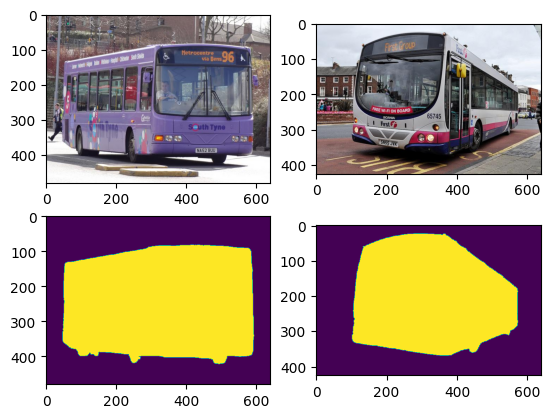

In [8]:
# visualize prompt images

plot_images_and_masks(prompt_image_paths, prompt_mask_paths)

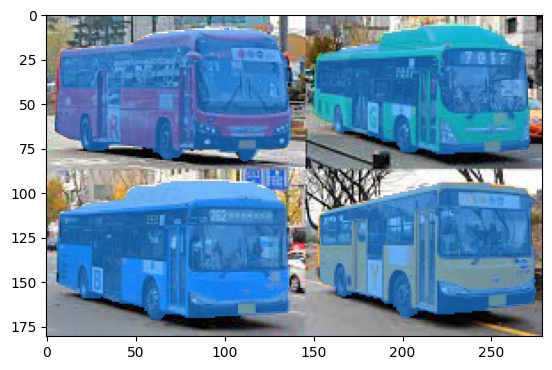

In [10]:
# inference an image
target_img_pth = "../samples/4buses.jpeg"
mask = seg_gpt.run_inference_image(target_img_pth, prompt_image_paths, prompt_mask_paths)
plot_mask(target_img_pth, mask)

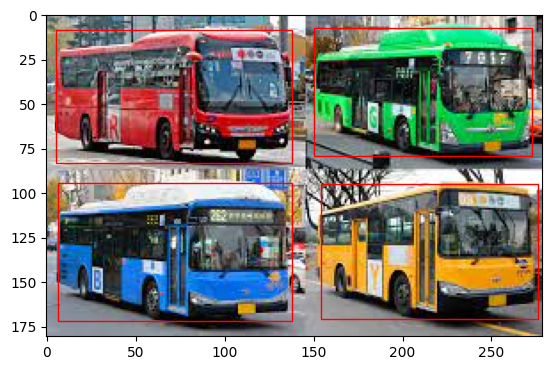

In [14]:
# create bounding boxes from masks and visualize
bboxes = mask_to_bbox(mask)

plot_image_and_bboxes(target_img_pth, bboxes)